#**Laporan Proyek Machine Learning - Dwi Rizki Kurnia**#

# **Domain Proyek**

Biaya asuransi kesehatan merupakan isu penting dalam sistem pelayanan medis, baik di negara maju maupun berkembang. Perusahaan asuransi berusaha menyesuaikan premi berdasarkan risiko individu, yang biasanya ditentukan oleh faktor-faktor seperti usia, status merokok, BMI, jumlah anak, dan wilayah tempat tinggal.

Namun, menghitung biaya asuransi secara manual seringkali tidak efisien dan rawan bias. Oleh karena itu, penggunaan machine learning dapat membantu dalam memprediksi biaya asuransi secara objektif dan akurat berdasarkan data historis pelanggan.

Referensi:

- Chen, C., et al. "Medical Cost Personal Dataset." Kaggle, 2018.  
- Xu, R., & Wunsch, D. "Clustering algorithms in biomedical research: A review." IEEE Reviews in Biomedical Engineering, 2010.

# **Business Understanding**

**Problem Statements**

1. Bagaimana memprediksi biaya asuransi medis berdasarkan karakteristik pelanggan?

2. Fitur apa saja yang paling memengaruhi besarnya biaya asuransi?

3. Bagaimana membangun model prediksi yang akurat dan dapat diandalkan untuk pelanggan baru?

**Goals**

1. Membangun model prediktif yang mampu menghasilkan prediksi biaya asuransi yang akurat dan dapat dipercaya.

2. Membangun model prediktif untuk memperkirakan biaya asuransi pelanggan baru.

3. Menyediakan solusi machine learning yang optimal untuk diaplikasikan pada data pelanggan baru, sehingga memudahkan penetapan premi yang sesuai.

**Solution Statements**

1. Membangun model baseline menggunakan Linear Regression.

2. Melakukan peningkatan model dengan menggunakan algoritma seperti Random Forest Regressor dan XGBoost.

3. Melakukan evaluasi dan perbandingan model menggunakan metrik MAE, MSE, dan RMSE untuk memilih model terbaik.




# **Data Understanding**

Dataset ini berjudul "Medical Cost Personal Dataset" dan tersedia di Kaggle:
🔗 https://www.kaggle.com/datasets/mirichoi0218/insurance

Dataset berisi 1338 baris dan 7 fitur.

Fitur-Fitur:

- age	(Usia pelanggan) (integer)

- sex	(Jenis kelamin) (male/female)

- bmi	(Body Mass Index) (float)

- children (Jumlah anak tanggungan) (integer)

- smoker	(Status merokok) (yes/no)

- region	(Wilayah tinggal) (northeast, northwest, southeast, southwest)

- charges	(Biaya asuransi yang dibayarkan) (float) — target variabel

# Data Loading

In [1]:
#Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dwirizkii","key":"300e9ddb5b0895ddab3368691253d049"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 67.5MB/s]


In [5]:
!unzip insurance.zip

Archive:  insurance.zip
  inflating: insurance.csv           


# Exploratory Data Analysis - Deskripsi Variabel

In [6]:
data = pd.read_csv("insurance.csv")

In [7]:
# Descriptive Statistics
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [8]:
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [9]:
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


# Menangani Missing Value dan Outliers

In [10]:
# Cek missing values
missing_values = data.isnull().sum()
print(missing_values)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Pada dataset ini, saya memeriksa apakah ada nilai yang hilang (missing values). Setelah pengecekan, ditemukan bahwa tidak ada missing value pada fitur-fitur utama. Hal ini memudahkan proses modeling karena tidak perlu imputasi data.

In [11]:
# Cek outliers menggunakan IQR untuk kolom numerik
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
outliers = {}
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers[col] = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)].shape[0]
    print(f"Outliers in {col}: {outliers[col]}")

Outliers in age: 0
Outliers in bmi: 9
Outliers in children: 0
Outliers in charges: 139


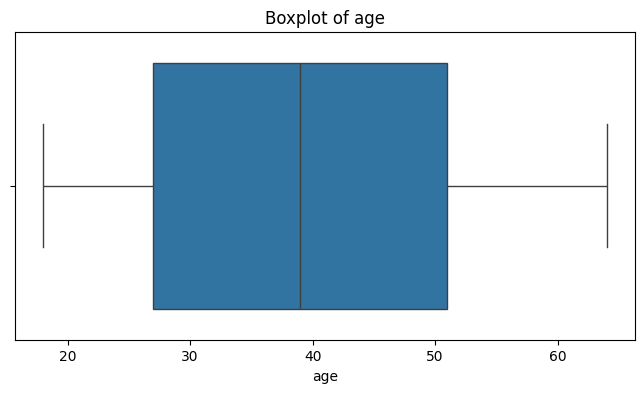

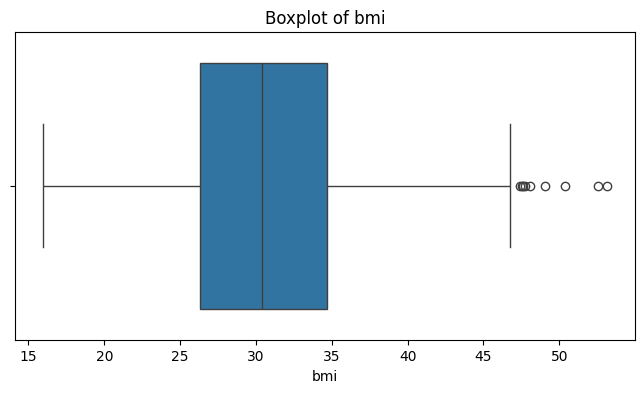

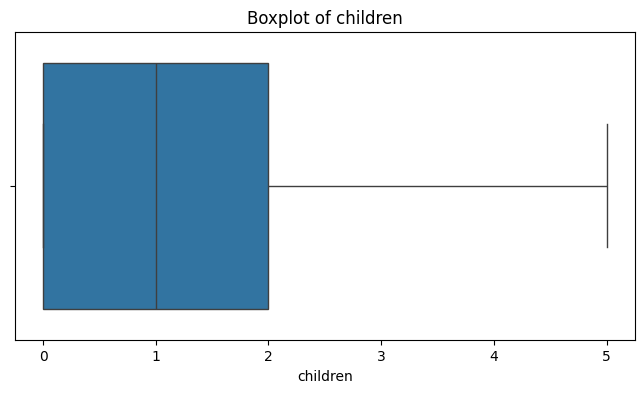

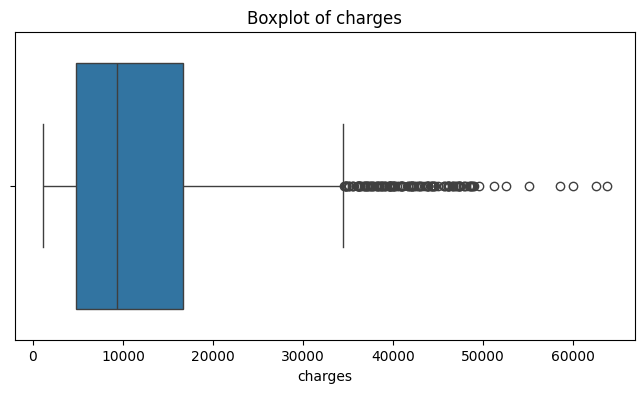

In [12]:
numerical_features = ['age', 'bmi', 'children', 'charges']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [13]:
Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)
IQR = Q3 - Q1

data_clean = data[~((data[numerical_features] < (Q1 - 1.5 * IQR)) | (data[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Univariate Analysis

**Bagi fitur pada dataset menjadi dua bagian**

In [14]:
# Fitur numerik
numerical_features = ['age', 'bmi', 'children', 'charges']

# Fitur kategorikal
categorical_features = ['sex', 'smoker', 'region']

#Numerical Features#

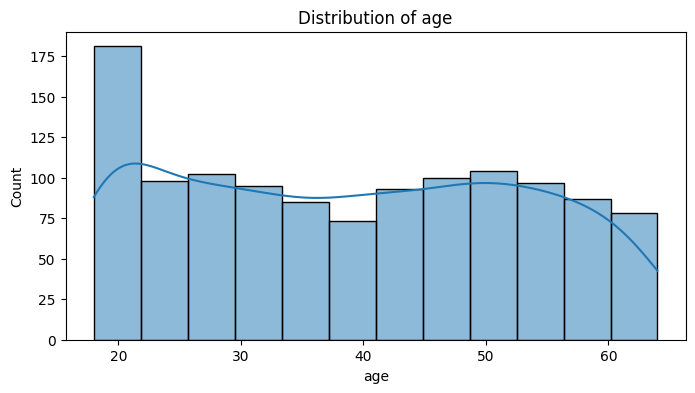

count    1193.000000
mean       38.981559
std        14.063482
min        18.000000
25%        26.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


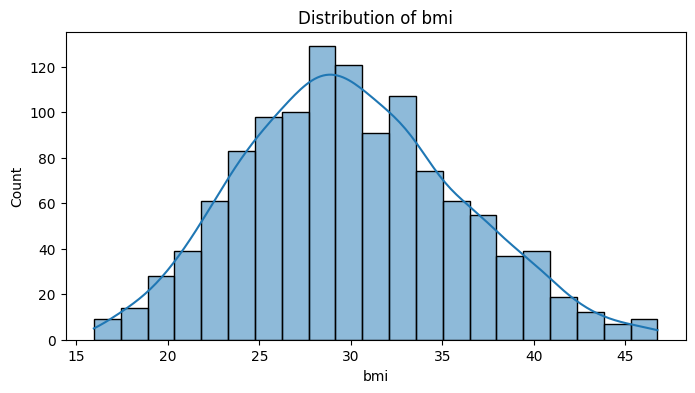

count    1193.000000
mean       29.998529
std         5.866873
min        15.960000
25%        25.800000
50%        29.735000
75%        33.770000
max        46.750000
Name: bmi, dtype: float64


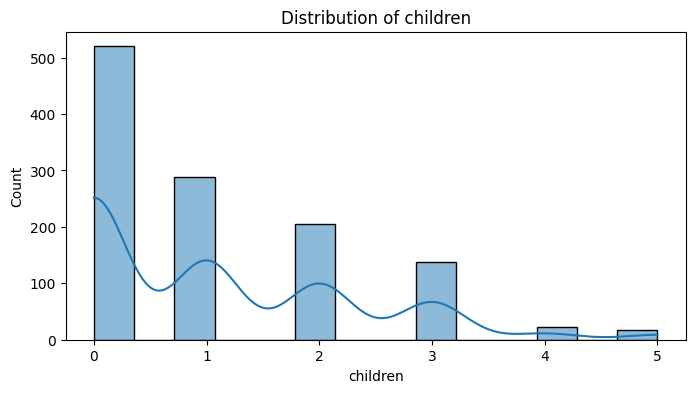

count    1193.000000
mean        1.085499
std         1.216249
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64


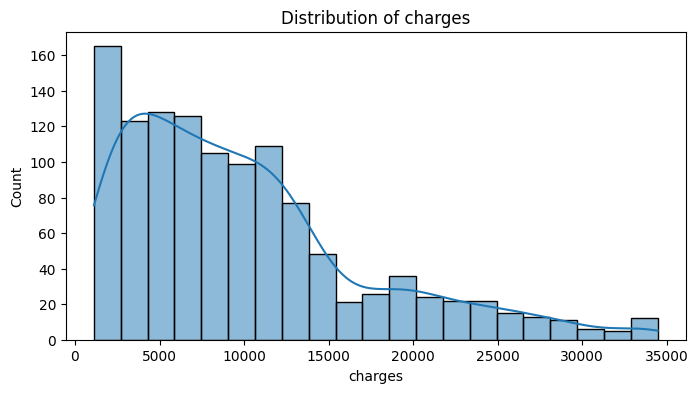

count     1193.000000
mean      9942.269682
std       7251.326564
min       1121.873900
25%       4415.158800
50%       8410.046850
75%      12979.358000
max      34472.841000
Name: charges, dtype: float64


In [15]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data_clean[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()
    print(data_clean[feature].describe())


# Categorical Features

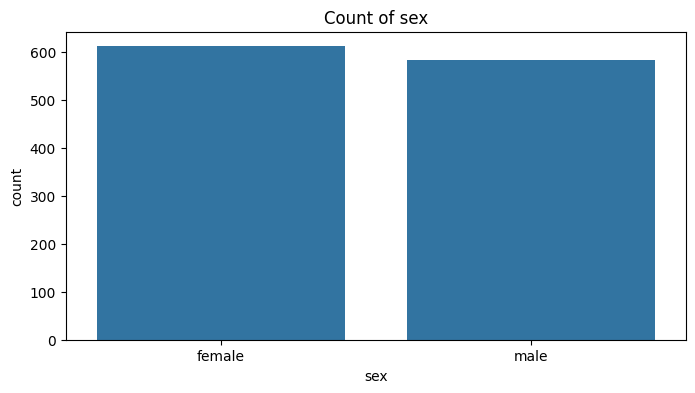

sex
female    51.215423
male      48.784577
Name: proportion, dtype: float64


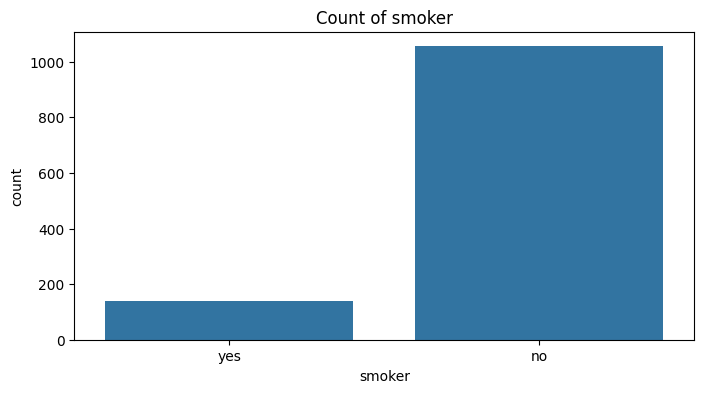

smoker
no     88.432523
yes    11.567477
Name: proportion, dtype: float64


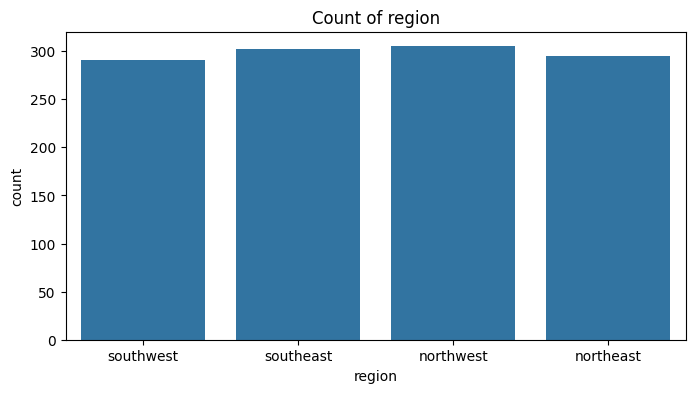

region
northwest    25.565801
southeast    25.314334
northeast    24.727578
southwest    24.392288
Name: proportion, dtype: float64


In [16]:
categorical_features = ['sex', 'smoker', 'region']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data_clean[feature])
    plt.title(f'Count of {feature}')
    plt.show()
    print(data_clean[feature].value_counts(normalize=True) * 100)


**Sex**

        jumlah sampel  persentase (%)
sex                                  
male              676            50.5
female            662            49.5


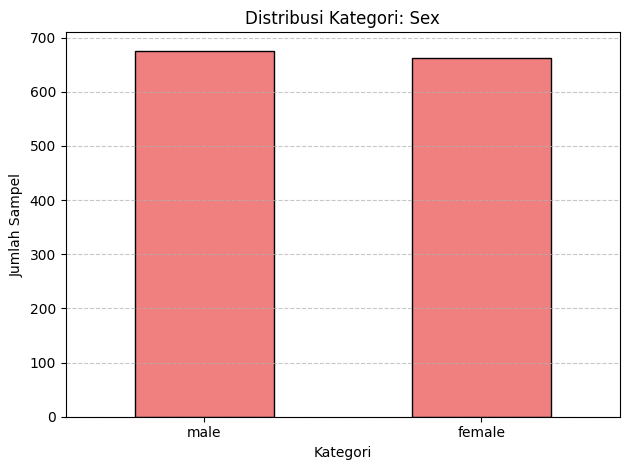

In [17]:
feature = 'sex'
count = data[feature].value_counts()
percent = 100 * data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel': count, 'persentase (%)': percent.round(1)})
print(df)

# Visualisasi
count.plot(kind='bar', title='Distribusi Kategori: Sex', color='lightcoral', edgecolor='black')
plt.ylabel('Jumlah Sampel')
plt.xlabel('Kategori')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Smoker**

        jumlah sampel  persentase (%)
smoker                               
no               1064            79.5
yes               274            20.5


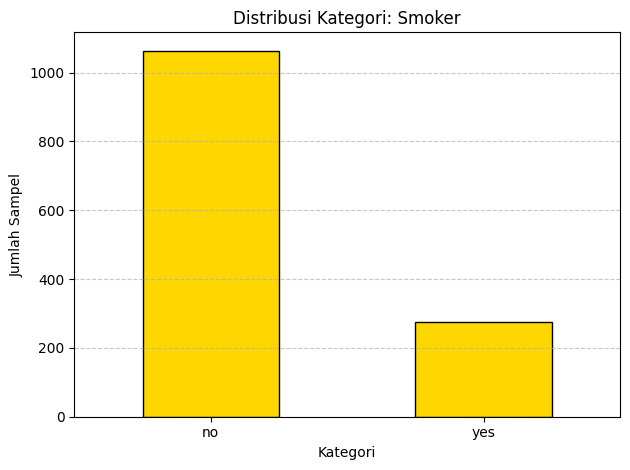

In [18]:
feature = 'smoker'
count = data[feature].value_counts()
percent = 100 * data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel': count, 'persentase (%)': percent.round(1)})
print(df)

# Visualisasi
count.plot(kind='bar', title='Distribusi Kategori: Smoker', color='gold', edgecolor='black')
plt.ylabel('Jumlah Sampel')
plt.xlabel('Kategori')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**region**

           jumlah sampel  persentase (%)
region                                  
southeast            364            27.2
southwest            325            24.3
northwest            325            24.3
northeast            324            24.2


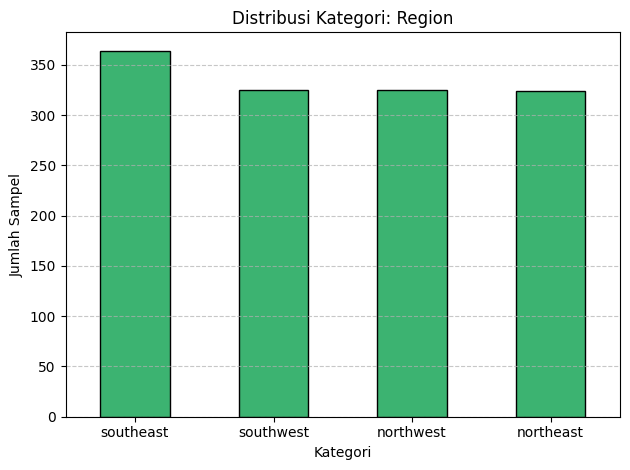

In [19]:
feature = 'region'
count = data[feature].value_counts()
percent = 100 * data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel': count, 'persentase (%)': percent.round(1)})
print(df)

# Visualisasi
count.plot(kind='bar', title='Distribusi Kategori: Region', color='mediumseagreen', edgecolor='black')
plt.ylabel('Jumlah Sampel')
plt.xlabel('Kategori')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Multivariate Analysis

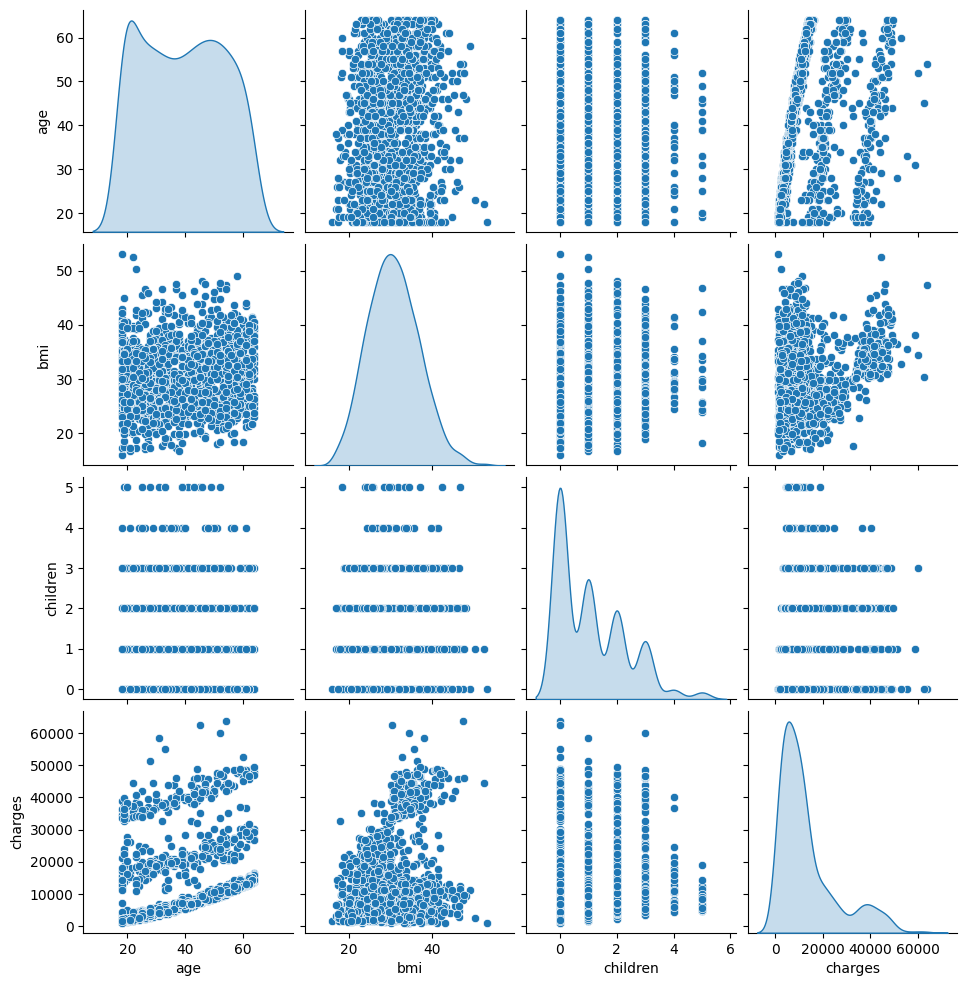

In [20]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(data, diag_kind = 'kde')

Korelasi Antar Fitur Numerik

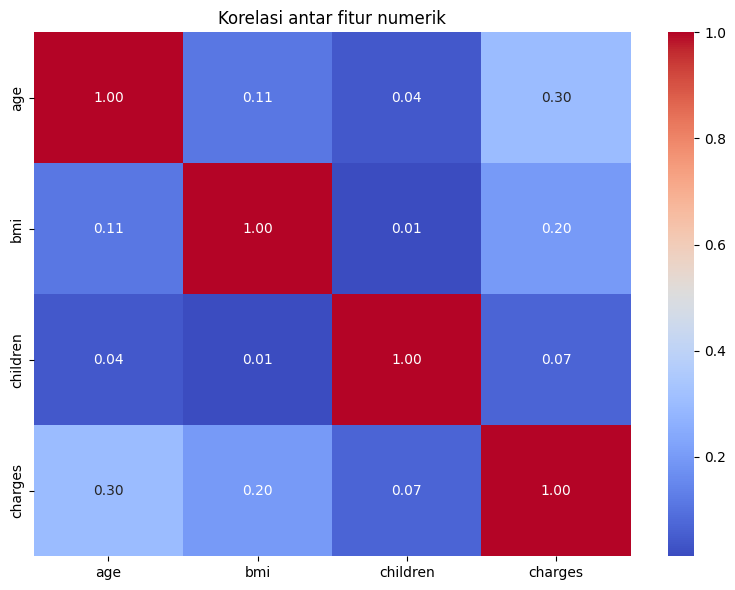

In [21]:
# Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antar fitur numerik")
plt.tight_layout()
plt.show()

# Data Preparation

**Encoding Fitur Kategori**

In [22]:
data_encoded = pd.get_dummies(data_clean, columns=categorical_features, drop_first=True)


Pada dataset ini, beberapa fitur bersifat kategori seperti sex, smoker, dan region. Karena algoritma machine learning umumnya hanya dapat memproses data numerik, maka fitur kategori diubah menjadi representasi numerik menggunakan teknik one-hot encoding. Misalnya, fitur sex diubah menjadi sex_male dan sex_female dengan nilai 0/1

**Reduksi Dimensi dengan PCA**

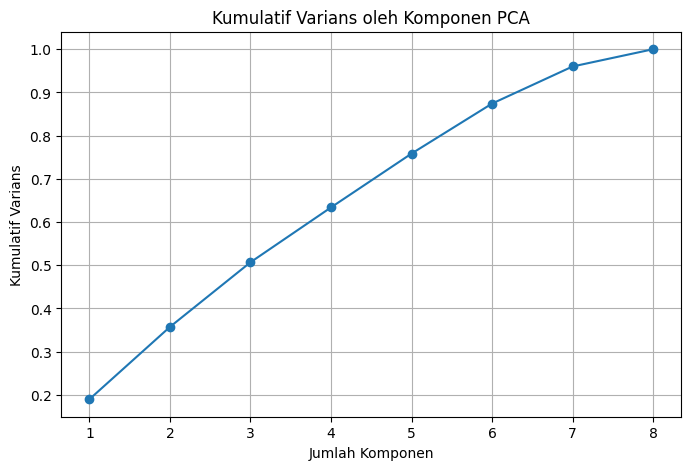

In [23]:
# Pisahkan fitur dan target
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Standarisasi sebelum PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA (jumlah komponen = jumlah fitur)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title("Kumulatif Varians oleh Komponen PCA")
plt.xlabel("Jumlah Komponen")
plt.ylabel("Kumulatif Varians")
plt.grid(True)
plt.show()

Reduksi dimensi membantu meningkatkan efisiensi komputasi dan dapat meningkatkan performa model dengan mengurangi noise dan fitur yang kurang informatif. PCA juga membantu mengurangi risiko overfitting.

**train_test_split**

In [24]:
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Standarisasi Fitur**

In [25]:
numerical_features_for_scaling = [feature for feature in numerical_features if feature != 'charges']

scaler = StandardScaler()
X_train[numerical_features_for_scaling] = scaler.fit_transform(X_train[numerical_features_for_scaling])
X_test[numerical_features_for_scaling] = scaler.transform(X_test[numerical_features_for_scaling])

Fitur numerik seperti age, bmi, dan charges distandarisasi menggunakan teknik StandardScaler agar memiliki mean = 0 dan standar deviasi = 1

# Modeling

In [26]:
models = {
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)

Saya menggunakan tiga algoritma regresi yaitu K-Nearest Neighbor (KNN), Random Forest, dan Gradient Boosting. Pemilihan ini dilakukan untuk membandingkan performa model berbasis instance-based (KNN), ensemble decision tree (Random Forest), dan boosting (Gradient Boosting).



In [27]:
y_pred_knn = models['KNN'].predict(X_test)
y_pred_rf = models['Random Forest'].predict(X_test)
y_pred_gb = models['Gradient Boosting'].predict(X_test)

print(len(y_pred_knn), len(y_pred_rf), len(y_pred_gb))

239 239 239


# Evaluasi Model

In [28]:
for name, model in models.items():
    predictions = model.predict(X_test)
    print(f'{name} Evaluation:')
    print('MAE:', mean_absolute_error(y_test, predictions))
    print('MSE:', mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
    print('R²:', r2_score(y_test, predictions))
    print('\n')


KNN Evaluation:
MAE: 2969.3039138493727
MSE: 23051721.739733405
RMSE: 4801.220859295415
R²: 0.5178760422827953


Random Forest Evaluation:
MAE: 2573.0978955062424
MSE: 20426721.242824256
RMSE: 4519.593039514095
R²: 0.5727776085461969


Gradient Boosting Evaluation:
MAE: 2370.8962083382207
MSE: 17879299.92690713
RMSE: 4228.3921207602225
R²: 0.6260566156706919




Dari data di atas, dapat disimpulkan bahwa model Gradient Boosting memberikan hasil terbaik dengan MAE dan RMSE terkecil serta nilai R² terbesar (0.63). Artinya, model ini mampu memprediksi biaya asuransi dengan kesalahan rata-rata yang lebih kecil dan menjelaskan 63% variasi biaya asuransi berdasarkan fitur yang tersedia.

Metrik yang dipakai

Saya menggunakan MAE (Mean Absolute Error), MSE (Mean Squared Error), RMSE (Root Mean Squared Error), dan R² (koefisien determinasi).

Penjelasan metrik

- MAE mengukur rata-rata kesalahan absolut antara prediksi dan nilai aktual, lebih mudah diinterpretasikan secara langsung (satuan sama dengan target).

- MSE memberikan penalti lebih besar terhadap kesalahan besar karena kuadrat dari error.

- RMSE adalah akar dari MSE, membuat skala kesalahan sama dengan target sehingga lebih mudah dibandingkan.

- R² menunjukkan proporsi variansi target yang dapat dijelaskan oleh model, semakin mendekati 1 semakin baik.

Alasan dipakai
Metrik ini cocok untuk regresi dan memberikan gambaran lengkap dari kesalahan prediksi dan kemampuan model dalam menjelaskan data.

In [29]:
data_prediksi = pd.DataFrame({
    'y_true': y_test,
    'prediksi_knn': y_pred_knn,
    'prediksi_rf': y_pred_rf,
    'prediksi_gb': y_pred_gb
})

print(data_prediksi.head())


          y_true  prediksi_knn  prediksi_rf  prediksi_gb
660   6435.62370   5875.425800  8471.368913  6173.525553
754  17128.42608   8873.406688  5743.823642  5920.880867
487   1253.93600   1597.156600  1441.001914  2042.172678
429  18804.75240   8880.850102  7605.726036  7965.803702
559   1646.42970   1832.259390  2034.421427  3287.622172


**Metrik Evaluasi yang Digunakan**

Dalam proyek prediksi biaya asuransi ini, metrik evaluasi yang digunakan meliputi:

* Mean Absolute Error (MAE)
MAE mengukur rata-rata absolut selisih antara nilai aktual dan nilai prediksi. MAE mudah diinterpretasikan karena satuannya sama dengan data asli (dalam kasus ini biaya asuransi dalam satuan mata uang). MAE memberikan gambaran seberapa jauh prediksi model rata-rata menyimpang dari nilai asli tanpa memperhatikan arah kesalahan.

*   Mean Squared Error (MSE)
MSE mengkuadratkan selisih antara nilai aktual dan prediksi, sehingga penalti terhadap kesalahan besar menjadi lebih berat. MSE cocok digunakan untuk mendeteksi prediksi yang sangat jauh dari nilai sebenarnya.


*   Root Mean Squared Error (RMSE)
RMSE adalah akar dari MSE, yang mengembalikan skala kesalahan ke satuan asli data sehingga lebih mudah diinterpretasikan dibandingkan MSE. RMSE juga sangat sensitif terhadap outlier.

* R-squared (R²)
R² mengukur proporsi variansi target yang dapat dijelaskan oleh model. Nilai R² berkisar dari 0 sampai 1, di mana nilai mendekati 1 menunjukkan model sangat baik dalam menjelaskan variasi data.


**Kesimpulan**

Metrik evaluasi yang dipilih sudah sesuai dengan tujuan proyek yaitu menghasilkan prediksi biaya asuransi yang akurat dan dapat dipercaya. Model Gradient Boosting layak dipilih sebagai model final karena memberikan keseimbangan terbaik antara kesalahan prediksi dan kemampuan menjelaskan variansi data.